## Read data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
X = np.array([df['x1'], df['x2'], df['x3']]).T
y = df['y'].values

## Data shuffle and split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70, 3) (70,)
(30, 3) (30,)


## Data standardlization

In [5]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test.reshape(-1, 1))

## Use LinearRegression to predict

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False, normalize=False)
lr.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)
Xnew = np.array([[1,1,1], [1,0,4],[3,2,1]])
lr.predict(Xnew)

[[-0.85375693  0.20246031 -0.0675277 ]] 0.0


array([[-0.71882431],
       [-1.12386771],
       [-2.22387784]])

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE of LinearRegression:",mean_squared_error(y_pred=lr.predict(X_test),y_true=y_test))
print("r2_score of LinearRegression:",r2_score(y_pred=lr.predict(X_test),y_true=y_test))

MSE of LinearRegression: 0.24943333704225154
r2_score of LinearRegression: 0.7697165489577988


## Use RidgeRegression to predict

### Select hyperparameter alpha

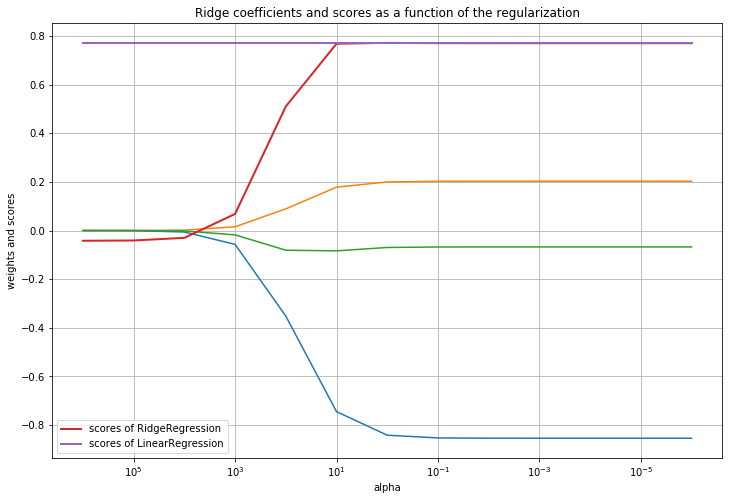

In [8]:
from sklearn import linear_model
n_alphas = 13
alphas = np.logspace(-6, 6, n_alphas)

coefs = []
scores_rr = []
scores_lr = [r2_score(y_pred=lr.predict(X_test),y_true=y_test)] * n_alphas
for a in alphas:
    rr = linear_model.Ridge(alpha=a, fit_intercept=True, max_iter=1000)
    rr.fit(X_train, y_train)
    coefs.append(rr.coef_[0])
    scores_rr.append(rr.score(X_test, y_test))

plt.figure(figsize=(12,8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.plot(alphas, scores_rr, linewidth=2, label='scores of RidgeRegression')
plt.plot(alphas, scores_lr, linewidth=2, label='scores of LinearRegression')
plt.legend(loc = 'lower left')
plt.xlabel('alpha')
plt.ylabel('weights and scores')
plt.title('Ridge coefficients and scores as a function of the regularization')
plt.axis('tight')
plt.grid(b=True)
plt.show()

So we let alpha=10

### Fit model

In [9]:
rr = linear_model.Ridge(alpha=10, fit_intercept=True, max_iter=1000)
rr.fit(X_train, y_train)
print(lr.coef_, lr.intercept_)
Xnew = np.array([[1,1,1], [1,0,4],[3,2,1]])
rr.predict(Xnew)

[[-0.85375693  0.20246031 -0.0675277 ]] 0.0


array([[-0.65003626],
       [-1.07912908],
       [-1.96092746]])

### Evaluate model

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE of RidgeRegression:",mean_squared_error(y_pred=rr.predict(X_test),y_true=y_test))
print("r2_score of RidgeRegression:",r2_score(y_pred=rr.predict(X_test),y_true=y_test))

MSE of RidgeRegression: 0.2516602029578036
r2_score of RidgeRegression: 0.7676606474727671


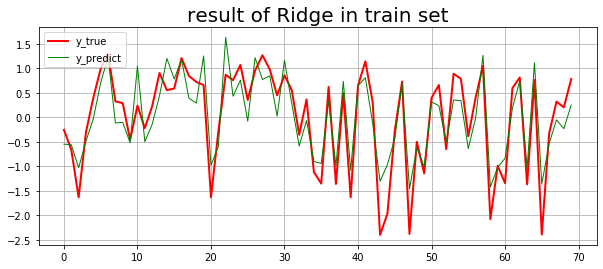

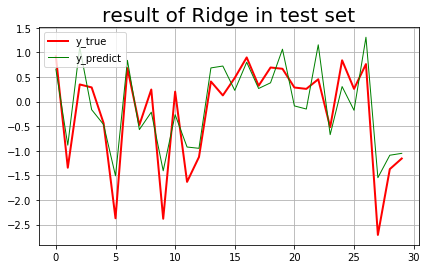

In [11]:
plt.figure(facecolor='w',figsize=(10,4))
t=np.arange(len(X_train))
plt.plot(t, y_train, 'r-', linewidth=2, label='y_true')
plt.plot(t, rr.predict(X_train), 'g-', linewidth=1, label='y_predict')
plt.legend(loc = 'upper left')
plt.title("result of Ridge in train set", fontsize=20)
plt.grid(b=True)
plt.show()

plt.figure(facecolor='w',figsize=(15,4))
t=np.arange(len(X_test))
plt.subplot(1,2,2)
plt.plot(t, y_test, 'r-', linewidth=2, label='y_true')
plt.plot(t, rr.predict(X_test), 'g-', linewidth=1, label='y_predict')
plt.legend(loc = 'upper left')
plt.title("result of Ridge in test set", fontsize=20)
plt.grid(b=True)
plt.show()